In [87]:
import seaborn as sns
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
g = sns.get_dataset_names()
print(g)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [96]:
df = sns.load_dataset('titanic') 
# df = Titanic dataset
print(df)



     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

## Data exploration tasks

### Display the first few rows of the dataset to understand its structure.

The first 5 rows of the Titanic data formatted with a pandas dataframe. This gives a brief overview of the dataset as opposed to inputting 'print()'.

In [10]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Describe basic statistics of numerical columns.

By using the 'describe()' function we can see the basic statistics of the columns.

In [15]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check for the total number of rows and columns.

In [17]:
print("Number of rows:",df.shape[0]) #Displays the number of rows
print("Number of columns:", df.shape[1]) #Displays the number of columns 

Number of rows: 891
Number of columns: 15


## Data Cleaning

In [14]:
import pandas as pd
import seaborn as sns

titanic_data = sns.load_dataset('titanic')

def clean_data(fd):
    # Removing NaN values
    fd.dropna(inplace=True)
    
    # Changing numeric values to categorical
    age_bins = [0, 18, 30, 60, fd['age'].max()]
    age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']
    fd['Age_Category'] = pd.cut(fd['age'], bins=age_bins, labels=age_labels, include_lowest=True)
    
    fare_bins = [0, 50, 100, fd['fare'].max()]
    fare_labels = ['Low', 'Medium', 'High']
    fd['Fare_Category'] = pd.cut(fd['fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
    
    class_bins = [0, 1, 2, fd['pclass'].max()]
    class_labels = ['First','Second','Third']
    fd['class'] = pd.cut(fd['pclass'], bins=class_bins, labels = class_labels, include_lowest=True)
    
    # Dropping unnecessary columns
    fd.drop(['sibsp','embarked', 'age', 'who', 'fare', 'parch', 'embark_town', 'adult_male', 'deck', 'alive', 'alone'], axis=1, inplace=True)
    
    return fd


titanic_data = clean_data(titanic_data.copy())  # Make a copy to keep original data intact

print(titanic_data)







     survived  pclass     sex  class Age_Category Fare_Category
1           1       1  female  First        Adult        Medium
3           1       1  female  First        Adult        Medium
6           0       1    male  First        Adult        Medium
10          1       3  female  Third        Child           Low
11          1       1  female  First        Adult           Low
..        ...     ...     ...    ...          ...           ...
871         1       1  female  First        Adult        Medium
872         0       1    male  First        Adult           Low
879         1       1  female  First        Adult        Medium
887         1       1  female  First  Young Adult           Low
889         1       1    male  First  Young Adult           Low

[182 rows x 6 columns]


## Exploratory Data Analysis

### Visualize the distribution of passenger ages using histograms.

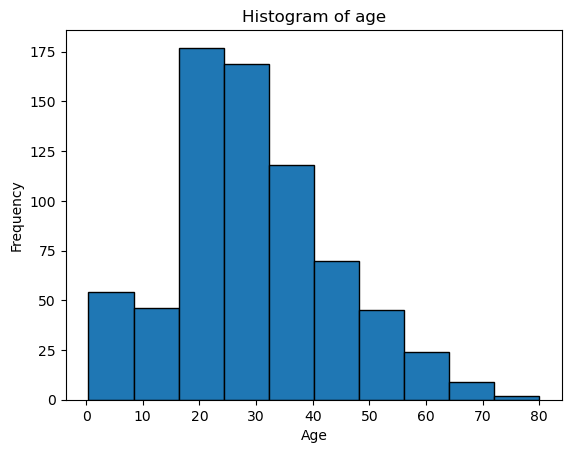

In [29]:
import math

df1 = sns.load_dataset('titanic')

column_to_plot = 'age'

#using Sturges' Formula to calculate bins based on the number of data points

num_bins = int(1 + math.log2(len(df1[column_to_plot].dropna())))


#making the histogram
df1[column_to_plot].plot(kind='hist',bins=num_bins,edgecolor='black')


#labelling the axis and making a title
plt.xlabel(column_to_plot.capitalize())
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_plot}')

plt.show()



This histogram clarifies that most the passengers were between the ages of 18-32. This is because together these passengers had a total count of 345.

### Analyse the survival rate by gender using a bar plot.

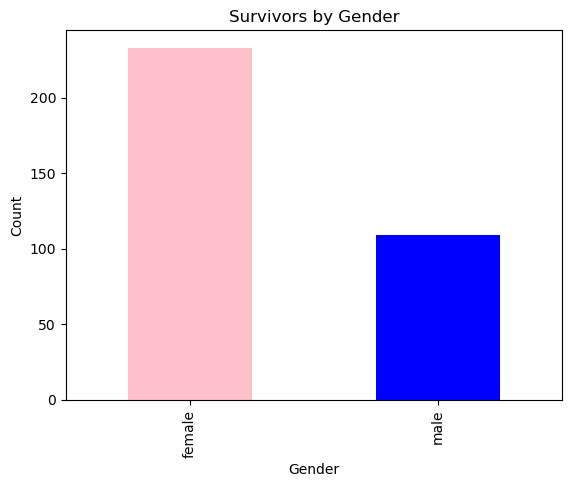

In [28]:
#filter the dataset to include only the survivors using boolean indexing 
survived = df[df['survived']==1]

#create a bar plot for survivors by gender
survived_by_gender = survived['sex'].value_counts()
survived_by_gender.plot(kind='bar',color=['pink','blue'])

#adding labels to axis
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survivors by Gender')

plt.show()

From this barchart visualises that more women survived the Titanic than men, this is because there were 200+ women and 100 men who survived. This highlights how the number of women who survived is close to twice the amount of men.

### Explore the survival rate by passenger class using a count plot.

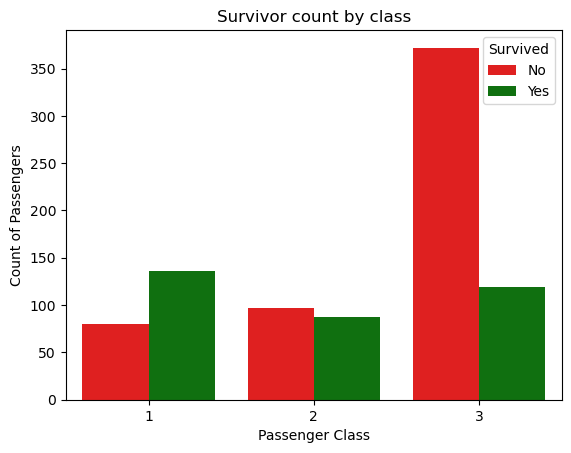

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Create a custom color palette
custom_palette = {1: 'green', 0: 'red'}  # Mapping '1' (survived) to green and '0' (died) to red

# Create the count plot with the specified color palette
sns.countplot(data=df, x='pclass', hue='survived', palette=custom_palette)
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.title('Survivor count by class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The count chart illustrates how the survivors would be more likely to survive if they were from the first class as opposed to the third class. What also can be highlighted is that the other classes had a disproportionate count of survivors.

### Create visualizations (e.g., heatmap) to explore correlations between variables (e.g., fare, age, survival).

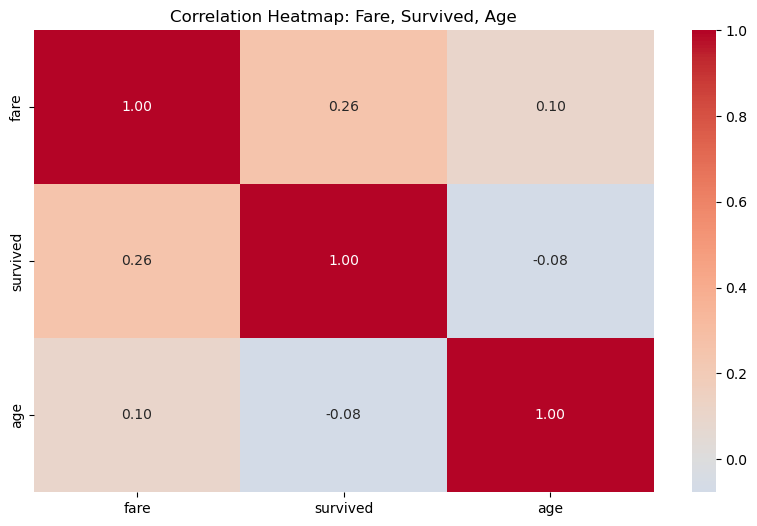

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
df = sns.load_dataset('titanic')
# Selecting a subset of columns
subset = df[['fare', 'survived', 'age']]

# Calculating the correlation matrix
correlation_matrix = subset.corr()

# Setting up the figure size
plt.figure(figsize=(10, 6))

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Heatmap: Fare, Survived, Age')
plt.show()






From the heatmap we deduct the following:
* the fare paid by passengers increased as the person was older
* the likely hood of survival  and age has a negative correlation, this means that the older the passenger was the increase in likelihood of them not surviving


### Creating an additional feature

In [17]:
import pandas as pd 
import seaborn as sns

data = sns.load_dataset('titanic')
df = pd.DataFrame(data)


#making a new feature, this shall be a family column 
df['family_size']= df['sibsp'] + df['parch'] + 1
print(df[['family_size']])



     family_size
0              2
1              2
2              1
3              2
4              1
..           ...
886            1
887            1
888            4
889            1
890            1

[891 rows x 1 columns]


This new column sums the count of siblings/spouses and parents/children and + 1 to account for the individual themselves.This column has created a co count representing the total number of family members an individual has on the Titanic.